In [1]:
# Imports and Downloads
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource
     

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Arushi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

using split():  ['life', 'is', 'an', 'everchanging', 'path', 'filled', 'with', 'experiences', 'that', 'teach']

using word_tokenize():  ['life', 'is', 'an', 'everchanging', 'path', 'filled', 'with', 'experiences', 'that', 'teach']

Word frequency distribution (excluding stopwords):
[('life', 1), ('everchanging', 1), ('path', 1), ('filled', 1), ('experiences', 1), ('teach', 1), ('transform', 1), ('us', 1), ('step', 1), ('whether', 1)]


<Axes: title={'center': 'Top 10 Words (No Stopwords)'}, xlabel='Samples', ylabel='Counts'>

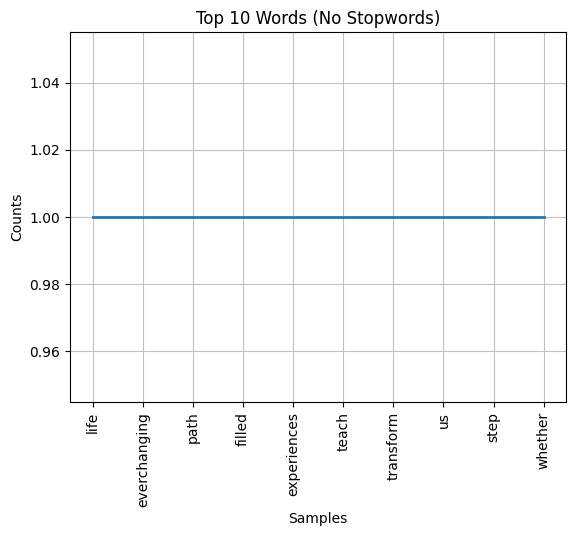

In [2]:
text = """Life is an ever-changing path filled with experiences that teach and transform us. Each step, whether smooth or challenging, contributes to our growth. What truly matters isn't just the destination, but the wisdom and strength we gain throughout the journey."""

# lowercase and remove punctuation
text_clean=re.sub(r'[^\w\s]', '', text.lower())

#words and sentence tokenisation
sentence_tokens=sent_tokenize(text)
words_tokens=word_tokenize(text_clean)

#split vs word_tokenise()
words_split = text_clean.split()
print("using split(): ", words_split[:10])
print("\nusing word_tokenize(): ", words_tokens[:10])

#remove stopwords
stop_words=set(stopwords.words('english'))
filtered_tokens=[word for word in words_tokens if word.lower() not in stop_words]

#frequency ditribution
freq_dist=FreqDist(filtered_tokens)
print("\nWord frequency distribution (excluding stopwords):")
print(freq_dist.most_common(10))
freq_dist.plot(10, title="Top 10 Words (No Stopwords)")
     

In [3]:

import pandas as pd
#only alphabets
alphabets=re.findall(r'[a-zA-Z]+', text_clean)
print(alphabets)

#remove stopwords
filtered_aplha=[word for word in alphabets if word.lower() not in stop_words]
print(filtered_aplha)

#stemmed vs lemmatised
stemmed_words=[PorterStemmer().stem(word) for word in filtered_aplha]
lemmatized_word=[WordNetLemmatizer().lemmatize(word) for word in filtered_aplha]
df=pd.DataFrame({'Original':filtered_aplha, 'Stemmed':stemmed_words, 'Lemmatized':lemmatized_word})
print(df);

['life', 'is', 'an', 'everchanging', 'path', 'filled', 'with', 'experiences', 'that', 'teach', 'and', 'transform', 'us', 'each', 'step', 'whether', 'smooth', 'or', 'challenging', 'contributes', 'to', 'our', 'growth', 'what', 'truly', 'matters', 'isnt', 'just', 'the', 'destination', 'but', 'the', 'wisdom', 'and', 'strength', 'we', 'gain', 'throughout', 'the', 'journey']
['life', 'everchanging', 'path', 'filled', 'experiences', 'teach', 'transform', 'us', 'step', 'whether', 'smooth', 'challenging', 'contributes', 'growth', 'truly', 'matters', 'isnt', 'destination', 'wisdom', 'strength', 'gain', 'throughout', 'journey']
        Original     Stemmed    Lemmatized
0           life        life          life
1   everchanging   everchang  everchanging
2           path        path          path
3         filled        fill        filled
4    experiences      experi    experience
5          teach       teach         teach
6      transform   transform     transform
7             us          us   

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pandas as pd

texts = [
    "The latest laptop is lightweight and performs exceptionally well.",
    "Weather update: A heavy storm is expected to hit the coast tomorrow.",
    "This coffee shop's ambiance is cozy, though the drinks are slightly expensive."
]

# Bag of words
cv = CountVectorizer()
X = cv.fit_transform(texts)
print(cv.get_feature_names_out())
print(X.toarray())

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
print('\n',tfidf.get_feature_names_out())
print(tfidf_matrix.toarray())

# 3. Top 3 keywords per text
print("\nTop 3 keywords per text (by TF-IDF):\n")
feature_names = tfidf.get_feature_names_out()
for i, text in enumerate(texts):
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    sorted_indices = tfidf_scores.argsort()[::-1]
    top_keywords = [feature_names[j] for j in sorted_indices[:3]]
    print(f"Text {i + 1}: {text}")
    print(f"Top 3 keywords: {top_keywords}\n")

['ambiance' 'and' 'are' 'coast' 'coffee' 'cozy' 'drinks' 'exceptionally'
 'expected' 'expensive' 'heavy' 'hit' 'is' 'laptop' 'latest' 'lightweight'
 'performs' 'shop' 'slightly' 'storm' 'the' 'this' 'though' 'to'
 'tomorrow' 'update' 'weather' 'well']
[[0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0]
 [1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0]]

 ['ambiance' 'and' 'are' 'coast' 'coffee' 'cozy' 'drinks' 'exceptionally'
 'expected' 'expensive' 'heavy' 'hit' 'is' 'laptop' 'latest' 'lightweight'
 'performs' 'shop' 'slightly' 'storm' 'the' 'this' 'though' 'to'
 'tomorrow' 'update' 'weather' 'well']
[[0.         0.36042988 0.         0.         0.         0.
  0.         0.36042988 0.         0.         0.         0.
  0.21287569 0.36042988 0.36042988 0.36042988 0.36042988 0.
  0.         0.         0.21287569 0.         0.         0.
  0.         0.         0.         0.36042988]
 [0.         0.         0.   

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

text1 = "Machine Learning (ML) is a subset of artificial intelligence focused on building systems that can learn from data. ML algorithms allow computers to identify patterns and make decisions without being explicitly programmed. It plays a crucial role in fields like natural language processing, image recognition, and predictive analytics, using data to improve over time."
text2 = "Cloud computing refers to the delivery of computing services over the internet, including storage, processing power, and databases. It allows businesses and individuals to access technology resources on-demand, without the need for physical infrastructure. Cloud computing is widely used for applications such as data backup, software hosting, and collaboration tools, providing scalability and flexibility across industries."

#preprocess nad tokenisation
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    return text.split()
tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

print(f"Tokens for text 1(AI): {tokens1}")
print(f"Tokens for text 2(Blockchain): {tokens2}")

# Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union
set1 = set(tokens1)
set2 = set(tokens2)
jaccard_sim = jaccard_similarity(set1, set2)
print(f"\nJaccard Similarity: {jaccard_sim}")

# Cosine similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(f"\nCosine Similarity: {cosine_sim[0][0]}")

# Analyze which better
print("\nAnalysis:")
if jaccard_sim > cosine_sim[0][0]:
    print("Jaccard Similarity gives better insights ")
else:
    print("Cosine Similarity gives better insights ")

Tokens for text 1(AI): ['machine', 'learning', 'ml', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence', 'focused', 'on', 'building', 'systems', 'that', 'can', 'learn', 'from', 'data', 'ml', 'algorithms', 'allow', 'computers', 'to', 'identify', 'patterns', 'and', 'make', 'decisions', 'without', 'being', 'explicitly', 'programmed', 'it', 'plays', 'a', 'crucial', 'role', 'in', 'fields', 'like', 'natural', 'language', 'processing', 'image', 'recognition', 'and', 'predictive', 'analytics', 'using', 'data', 'to', 'improve', 'over', 'time']
Tokens for text 2(Blockchain): ['cloud', 'computing', 'refers', 'to', 'the', 'delivery', 'of', 'computing', 'services', 'over', 'the', 'internet', 'including', 'storage', 'processing', 'power', 'and', 'databases', 'it', 'allows', 'businesses', 'and', 'individuals', 'to', 'access', 'technology', 'resources', 'ondemand', 'without', 'the', 'need', 'for', 'physical', 'infrastructure', 'cloud', 'computing', 'is', 'widely', 'used', 'for', 'applications', '

In [7]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.9 MB/s eta 0:00:00


In [9]:
!pip install wordcloud


Review: The headphones are amazing! Clear sound and long battery life.
Polarity: 0.3
Subjectivity: 0.5208333333333333
Positive Review

Review: The packaging was poor and the item arrived slightly damaged.
Polarity: -0.2833333333333333
Subjectivity: 0.3833333333333333
Negative Review

Review: I’m happy with the performance so far. It works as expected.
Polarity: 0.26666666666666666
Subjectivity: 0.7999999999999999
Positive Review

Review: Very slow and laggy. I regret buying this phone.
Polarity: -0.39000000000000007
Subjectivity: 0.52
Negative Review

Review: Decent quality for the price. Nothing extraordinary but fair enough.
Polarity: 0.3
Subjectivity: 0.7666666666666666
Positive Review


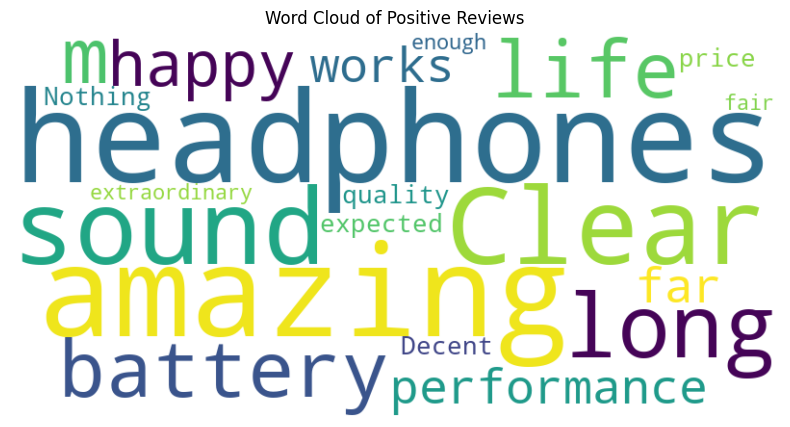

In [10]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews = [
   "The headphones are amazing! Clear sound and long battery life.",
    "The packaging was poor and the item arrived slightly damaged.",
    "I’m happy with the performance so far. It works as expected.",
    "Very slow and laggy. I regret buying this phone.",
    "Decent quality for the price. Nothing extraordinary but fair enough."
]


for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    print(f"\nReview: {review}")
    print(f"Polarity: {polarity}")
    print(f"Subjectivity: {subjectivity}")
    if(polarity>0):
        print("Positive Review")
    elif(polarity<0):
        print("Negative Review")
    else:
        print("Neutral Review")
positive_reviews = [review for review in reviews if TextBlob(review).sentiment.polarity > 0]
word_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

In [11]:
!pip install keras tensorflow

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
import numpy as np
import random

text="""Quantum computing is an advanced field of computation that uses quantum-mechanical phenomena to perform calculations. 
It leverages principles like superposition and entanglement to solve problems that are infeasible for classical computers. 
Unlike traditional computers, quantum systems can process vast amounts of data simultaneously,
offering potential breakthroughs in fields like cryptography, optimization, and drug discovery. 
Quantum computing holds promise for revolutionizing industries by enabling faster and more efficient problem-solving methods."""

tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
tot_words=len(tokenizer.word_index)+1

input_sequences= []
words = text.split()
for i in range(1, len(words)):
    seq = words[:i+1]
    tokenized_seq = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    input_sequences.append(tokenized_seq)

max_seq_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

x=input_sequences[:, :-1]
y=input_sequences[:, -1]

model=Sequential()
model.add(Embedding(tot_words, 10, input_length=max_seq_len-1))
model.add(LSTM(150))
model.add(Dense(tot_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text
print(generate_text("Cognitive computing", 5))
print(generate_text("data", 4))
print(generate_text("These systems", 6))

D:\python 3.11\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Cognitive computing can can can can by
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
data can can can by
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
These systems can can can by by by
